# Linear Regression

In this notebook, we will go through the linear regression algorithms to estimate the price of houses in Boston.

First, it is shown how to compute the predictions using a single feature. Later on, the predictions are expanded for multiple features. In both cases, I will compare my predictions with the Turicreate outputs.

# Linear regression with a single feature

In the first part, let's run the Turicreate linear regression algorithm to understand is functionality.

In [39]:
import turicreate as tc
import matplotlib.pyplot as plt
%matplotlib inline

Loading data

In [40]:
data = tc.SFrame('BostonHousing.csv')

Read 100 lines. Lines per second: 946.692

Finished parsing file /home/marceloguarido/OneDrive/Machine_Learning/Linear_Regression/BostonHousing.csv

Parsing completed. Parsed 100 lines in 0.111546 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/marceloguarido/OneDrive/Machine_Learning/Linear_Regression/BostonHousing.csv

Parsing completed. Parsed 21613 lines in 0.108885 secs.

Taking a look at the loaded data

In [41]:
data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


Spliting data into training and testing sets

In [42]:
train_data, test_data = data.random_split(0.8, seed=0)

Creating a model using the turicreate.linear_regression.create using the living square feet size as the feature.

In [43]:
model = tc.linear_regression.create(train_data, target='price', features = ['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16548

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.022278     | 4345329.553816     | 2132674.601101       | 263398.026884 | 253787.619131   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

Making the predicitons

In [44]:
predictions = model.predict(test_data)

Evaluating the predictions

In [45]:
results = model.evaluate(test_data)

In [46]:
print results

{'max_error': 4140248.044995152, 'rmse': 255199.2891575794}


Plotting the model

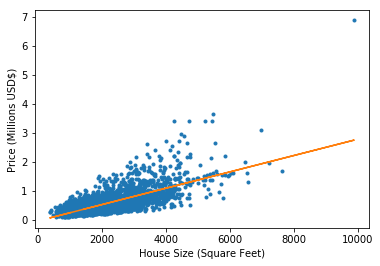

In [47]:
plt.plot(test_data['sqft_living'], test_data['price']/1000000,'.',
         test_data['sqft_living'], predictions/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

Making a prediction for a single value.

In [48]:
size_to_predict = 15000
forecast = model.predict(tc.SFrame({'sqft_living':[size_to_predict]}))
print forecast

[4187660.978119171]


# Now, let's create our own function

We want to fit a line that best estimates all the values in the training set. For that, we need to find 2 parameters: the slope and the intercept. The equation of the line is:

$$y_{i}^{,}(x_i) = w_0 + w_{1}*x_i$$

Now, we want to find the parameters $w_0$ and $w_1$ that reduces the cost function (the sum of the squared difference between measured data $y_i$ to the predicted data $y_{i}^{,}$):

$$RSS(w_0,w_1) = \sum_{i=1}^{N}(y_i - y_{i}^{,})^2 = \sum_{i=1}^{N}(y_i - [w_0 + w_{1}*x_i])^2$$

Minimizing the cost function means to take the derivative of cost function for each parameter ($w_0$ and $w_1$) and make it equal to zero. This leads to 2 simple formulas for $w_0$ and $w_1$:

$$w_0 = \frac{\sum_{i=1}^{N}y_i}{N} - w_{1}\frac{\sum_{i=1}^{N}x_i}{N}$$

and

$$w_1 = \frac{\sum_{i=1}^{N}y_{i}x_{i} - \frac{\sum_{i=1}^{N}y_{i}\sum_{i=1}^{N}x_{i}}{N}}{\sum_{i=1}^{N}x_{i}^2 - \frac{\sum_{i=1}^{N}x_{i}\sum_{i=1}^{N}x_{i}}{N}}$$

With the equations above, it is possible to compute the intercept ($w_0$) and the slope ($w_1$) that best predict the output $(y_{i}^{'})$ given the input $x_i$ and the measured data $y_i$ (for one feature only).

Now, let's create the function that gets the input feature $x_i$ and the measured data $y_i$ of the training set, and return the intercept $w_0$ and the slope $w_1$.

In [49]:
def linear_regression_single(input_feature, measured_data):
    # First, let's compute the sums and squared sums of the parameters equations
    Isum = input_feature.sum()
    Msum = measured_data.sum()
    IMsum = sum([input_feature[i]*measured_data[i] for i in range(len(input_feature))])
    IIsum = sum([input_feature[i]*input_feature[i] for i in range(len(input_feature))])

    # We need to compute the slope first
    num = IMsum-(1./len(input_feature)*(Isum*Msum))
    den = IIsum-(1./len(input_feature)*(Isum*Isum))
    slope = num/den
    
    # Now that we have the slope, we can compute the intercept
    intercept = (1./len(input_feature))*Msum-slope*Isum*(1./len(input_feature))
    
    # Return the parameters
    return (intercept, slope)

Let's check our function

In [50]:
intercept_1, slope_1 = linear_regression_single(train_data['sqft_living'], train_data['price'])

print "Intercept: " + str(intercept_1)
print "Slope: " + str(slope_1)

Intercept: -47116.0790729
Slope: 281.95883963


Those values look close to the ones obtained by using the Turicreate.

The next step is to calculate the estimations $y_{i}^{,}$ by using the linear equation:

$$y_{i}^{,}(x_i) = w_0 + w_{1}*x_i$$

Let's create a function that gets the input feature $x_i$ and the measured data $y_i$. It needs to estimate the intercept $w_0$ and slope $w_1$ and calculate the predictions $y_{i}^{,}$ using the linear equation above.

In [51]:
def regression_predictions_single(input_feature, measured_data, single_input = 0):
    # First, we need to estimete the intercept and the slope
    intercept, slope = linear_regression_single(input_feature, measured_data)
    
    # Now, compute the predictions
    predicted_values = intercept + slope*input_feature
    
    # Computing single prediction to compare functions
    single_prediction = 0
    if single_input != 0:
        single_prediction = intercept + slope*single_input
        
    # Return outputs
    return predicted_values, single_prediction

The following function has the input feature, slope and intercept as input so the can estimate the parameters in the training data and make predictions in the testing data.

In [52]:
def regression_predictions_single_test(input_feature, slope, intercept, single_input = 0):
    # In this functions, we input the slope and intercept, so we can make predictions on the testing set
    predicted_values = intercept + slope*input_feature

    # Computing single prediction to compare functions
    single_prediction = 0
    if single_input != 0:
        single_prediction = intercept + slope*single_input
        
    # Return outputs
    return predicted_values, single_prediction

Let's test our function:

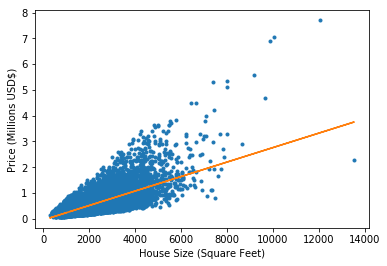

In [53]:
predictions, single_prediction = regression_predictions_single(data['sqft_living'], data['price'], size_to_predict)

plt.plot(data['sqft_living'], data['price']/1000000,'.',
         data['sqft_living'], predictions/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

Above, we did a linear regression for the whole dataset. Below, we are using the slope and intercept estimated in the training data to make estimations over the testing data.

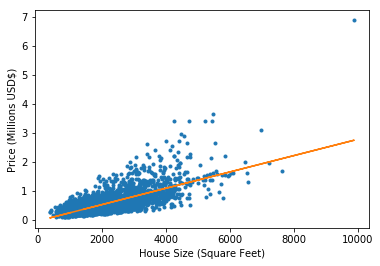

In [54]:
predictions2, single_prediction2 = regression_predictions_single_test(test_data['sqft_living'], slope_1, intercept_1, size_to_predict)

plt.plot(test_data['sqft_living'], test_data['price']/1000000,'.',
         test_data['sqft_living'], predictions2/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

In [55]:
print single_prediction2
print forecast

4182266.51538
[4187660.978119171]


Again, it is very similar to the estimation we get with the Turicreate. But we did all for only a single feature. How do we proceed having multiple features? But before going for multiple features, we need to evaluate our predictions. One way to evaluate the prediction model, is to calculate the **_Residual sum of squares_** (RSS).

$$RSS(w_0,w_1) = \sum_{i=1}^{N}(y_i - [w_0 + w_{1}*x_i])^2$$

Let's create the function that computes the RSS by inputing the predictions $y_{i}^{,}$ and the measured data $y_i$. 

In [56]:
def calculate_RSS(predictions,measured_data):
    # First, let's calculate the residuals (difference between measured and predictated data)
    residuals = measured_data - predictions
    
    # Compute RSS
    RSS = sum([residuals[i]*residuals[i] for i in range(len(residuals))])
    
    # Return RSS
    return(RSS)

Let's check our RSS

In [57]:
rss_test = calculate_RSS(predictions2,test_data['price'])

print rss_test

2.75402933618e+14


# Linear regression with multiple features

Now it is time to predict the house prices using multiple features. First, let's demonstrate how to do that using the Turicreate. Basically, it follows the same steps as the linear regression with a single feature.

In [58]:
import turicreate as tc
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
data = tc.SFrame('BostonHousing.csv')

Finished parsing file /home/marceloguarido/OneDrive/Machine_Learning/Linear_Regression/BostonHousing.csv

Parsing completed. Parsed 100 lines in 0.101952 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/marceloguarido/OneDrive/Machine_Learning/Linear_Regression/BostonHousing.csv

Parsing completed. Parsed 21613 lines in 0.093544 secs.

In [60]:
train_data, test_data = data.random_split(0.8, seed=0)

In [61]:
multiple_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'condition']
model_multiple = tc.linear_regression.create(train_data, target='price', features = multiple_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16515

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.084044     | 3904945.259042     | 2211911.869849       | 246123.258844 | 252016.568523   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [62]:
predictions_multiple = model_multiple.predict(test_data)
results_multiple = model_multiple.evaluate(test_data)

print results_multiple

{'max_error': 3768858.7169176526, 'rmse': 242599.03994132252}


In [63]:
size_to_predict = 15000
forecast_multiple = model_multiple.predict(tc.SFrame({'sqft_living':[size_to_predict]}))
print forecast_multiple
print forecast

[4551833.352174054]
[4187660.978119171]


We can see the the forecast for a house with 15000 sqrtfeet living size changed when we compare the multiple features predictions with the single feature predictions.

If we plot the predictions comparing with the testing data, we can observe that the predictions are not a single line anymore:

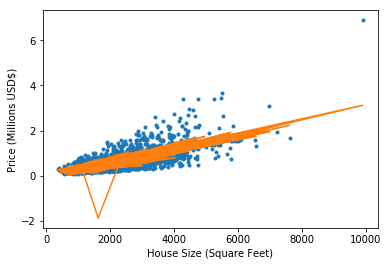

In [64]:
plt.plot(test_data['sqft_living'], test_data['price']/1000000,'.',
         test_data['sqft_living'], predictions_multiple/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

# Let's build our own functions

Until now, I applied the linear regression over one single feature. This way, it was easy to find an analytical solution for the linear equation. Now, I will explore the use of several features and an analytical solution is not recommended. So, I will show how to use the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) method to fit the best "curve". The idea is to use an iterative strategy to find the best parameters w that leads to the lowest value between the difference of the predictions and the actual data.

The "linear" equation for multiple parameters (now a multi-dimensinal plane) can be written as:

$$y_{i}^{,}(x_i) = w_0*x_{i}[0] + w_{1}*x_{i}[1] + w_{2}*x_{i}[2] + \dots + w_{d}*x_{i}[d] = \sum_{j=0}^{d}w_j*x_{i}[j]$$

where $x_i[0]=1$. We can use matrix notation and use the dot product of the parameters $\textbf{w}$ with the features $\textbf{x}_i$:

$$y_{i}^{,}(\textbf{x}_i) = \textbf{w}^{T}\textbf{x}_i$$

The cost function (RSS) is:

$$RSS(\textbf{w}) = \sum_{i=1}^{N}(y_i - y_{i}^{,})^2 = \sum_{i=1}^{N}(y_i - \textbf{w}^{T}\textbf{x}_i)^2 = (\textbf{y} - \textbf{w}^{T}\textbf{x})^{T}(\textbf{y} - \textbf{w}^{T}\textbf{x})$$

The gradient $\Phi$ (the derivative of RSS relative to $\textbf{w}$) is:

$$\Phi = -2\textbf{x}^{T}(\textbf{y} - \textbf{w}^{T}\textbf{x})$$

In others words, we just need to take the dot product between the features and the residuals (the difference between the predictions and the measured data) and multiply by 2. The gradient is used to update the parameters $\textbf{w}$ iteratively in a way to minimize the errors (set the gradient to zero). In the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) method, for the n-th iteration, we end up with the following equation:

$$\textbf{w}_{n+1} = \textbf{w}_{n} - \alpha\Phi = \textbf{w}_{n} + 2{\alpha}\textbf{x}^{T}(\textbf{y} - \textbf{w}^{T}_{n}\textbf{x})$$

where $\alpha$ is the step length, a scalar that helps the minimization to converge faster to the minimum point. The choice of the step length shows to be trick, as a large value wil lead to minimization to diverge as a too small value will diverge slowly.

Now we shall be able to compute the best set of parameters given a set of features and the output target. But to compute this, first we need to convert the data in the sframe format (the Turicreate dataframe) to a numpy numerical matrix. We will create a series of functions to combine in a final one that will calculate the parameters.

In [65]:
import numpy as np

The following function gets the sframe dataset and the names of the features and the target output to be converted to a numerical matrix.

In [66]:
def get_numpy_data(data_sframe, features, output):
    # First, create a column with the feature w_0 = 1
    data_sframe['constant'] = 1

    # Include the w_0 in the features list in the first column
    features = ['constant'] + features 
    
    # From the sframe data, pick only desired features and convert to numerical matrices
    feature_matrix = data_sframe[features].to_numpy()
    
    # Doing the same for the output
    output_array = data_sframe[output].to_numpy()
    
    # Return the features and output target as numerical matrices
    return(feature_matrix, output_array)

Let's test the function.

In [67]:
(example_features, example_output) = get_numpy_data(data, ['sqft_living'], 'price') # the [] around 'sqft_living' makes it a list
print example_features[0,:] 
print example_output[0] 

[   1 1180]
221900.0


Now, to make our life easier, we can use the fact that the predictions are simply the dot product of the parameters with the features to create a function to compute the prediction given the matrix of the features and the array of parameters.

In [68]:
def predict_output(feature_matrix, weights):
    # Th predictions are the dot product of the features and weights (parameters)
    predictions = np.dot(feature_matrix,weights)
    
    # Return the predictions
    return(predictions)

Let's test and compare.

In [69]:
# First computing manually
my_weights = np.array([1., 1.]) # the example weights
my_features = example_features[0,] # we'll use the first data point
predicted_value = np.dot(my_features, my_weights)

# Now using our function
test_predictions = predict_output(example_features, my_weights)

print predicted_value
print test_predictions[0]
print test_predictions[1]

1181.0
1181.0
2571.0


Okay, we are almost there. Now, let's use the equation forthe gradient to create a function to estimate it.

In [70]:
def feature_derivative(residuals, feature):
    # Using the equation of the derivative,the dop product between the features and residuals
    derivative = 2*np.dot(residuals,feature)
    
    # Return the derivative
    return(derivative)

Let's test it.

In [71]:
# Using only on feature
(example_features, example_output) = get_numpy_data(data, ['sqft_living'], 'price') 

# Making the parameters = 0 so the derivative should be
# equal the sum of the output. This is an easy way to
# evaluate our function
my_weights = np.array([0., 0.])

test_predictions = predict_output(example_features, my_weights) 

residuals = test_predictions - example_output

# Let's compute the derivative with respect to 'constant',
# the ":" indicates "all rows"
features = example_features[:,0] 

derivative = feature_derivative(residuals, features)

print derivative
print -np.sum(example_output)*2 # should be the same as derivative
print derivative - (-np.sum(example_output)*2) # should be ZERO

-23345850016.0
-23345850016.0
0.0


Perfect. Now, to the gradient descent method. We need to define a stoping criteria (tolerace), a defined value that stops the loop if the gradient is smaller, the initial parameters (weights) guess, and the step length (set as constant for all the iterations).

In [72]:
from math import sqrt

In [73]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0
    
    while not converged:
        # Compitung predictions with current weights
        predictions = predict_output(feature_matrix, weights) 
        
        # Computing current residuals
        residuals = predictions-output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Estimating the derivative for each parameter (weight)
            derivative = feature_derivative(residuals,feature_matrix[:, i])
            
            # add the squared value of the derivative to the gradient magnitude (for assessing convergence)
            gradient_sum_squares = gradient_sum_squares + (derivative*derivative)
            
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i]-step_size*derivative
        
        # compute the square-root of the gradient sum of squares to get the gradient matnigude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        iteration = iteration+1

        # The tolerance is our stoping criteria
        if gradient_magnitude < tolerance:
            converged = True
    
    # Return the parameters (weights) and number of iterations
    return(weights,iteration)

Testing.

In [74]:
# Let's run the function over the train data
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

# Gradient descent
(weights,iteration) = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

# Predictions over the test data
(test_feature_matrix, test_output_new) = get_numpy_data(test_data, model_features, my_output)
prediction = predict_output(test_feature_matrix, weights)

# Checking outputs
print weights
print iteration
print prediction[0]
print output[0]
print prediction[0] - output[0]

[-9.99999688e+04  2.45072603e+02  6.52795267e+01]
274
366651.4116294939
221900.0
144751.41162949387


To use features with different number sizer (like the house sqrtft size and number of bedrooms), we need to [scale the features](https://en.wikipedia.org/wiki/Feature_scaling) to have them all in the same scale, but we are not applying it now..